Нейронные сети для начинающих. Часть 1

https://habr.com/en/post/312450/

In [202]:
import numpy as np
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import pandas as pd

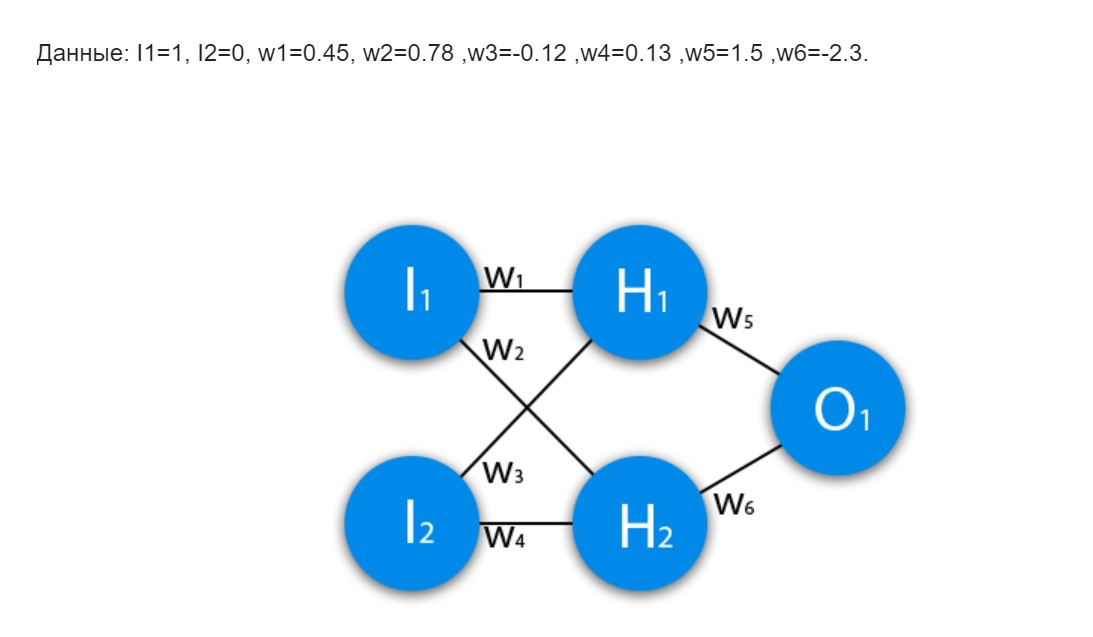

In [203]:
from IPython.display import Image
Image("Screenshot_2.jpg", width=500, height=300)

0xor0=0, 0xor1=1, 1xor0=1,1xor1=0

In [204]:
I1=1
I2=0
w1=0.45
w2=0.78
w3=-0.12
w4=0.13
w5=1.5
w6=-2.3
X_train = [[0,0], [0,1], [1,0], [1,1]]
y_train = [0,1,1,0] 

In [205]:
def sigmo(X):
    return 1 / (1 + np.e**-X)

In [206]:
def rmse(true_val, pred_val):
    from math import sqrt
    
    error = []
    
    for i,n in zip(true_val, pred_val):
        err = (i-n)**2
        error.append(err)
        
    return sqrt(sum(error)/len(error))

In [207]:
def n_net(i1,i2,w1,w2,w3,w4,w5,w6):
    H1_inp = i1*w1 + i2*w3
    H1_out = sigmo(H1_inp)

    H2_inp = i1*w2 + i2*w4
    H2_out = sigmo(H2_inp)

    O1_inp = H1_out*w5 + H2_out*w6
    O1_out = sigmo(O1_inp)

    return O1_out


In [211]:
n = 0
true_vals=[]
pred_vals = []

for x,y in zip(X_train, y_train):
    pred_val = n_net(i1=x[0],i2=x[1],w1=w1,w2=w2,w3=w3,w4=w4,w5=w5,w6=w6)
    print('INPUT:{}'.format(x))
    print('RESULT:{:.3f}'.format(pred_val))
    pred_vals.append(pred_val)
    print('CORRECT:{}'.format(y))
    true_vals.append(y)
    error = (y - pred_val)**2
    print('SQUARED ERROR (по одной итерации) = ({:.3f} - {:.3f})**2 = {:.3f}'.format(y, pred_val, error))
    print('-'*10)
print('RMSE (по эпохе): {:.3f}'.format(rmse(true_vals, pred_vals)))





INPUT:[0, 0]
RESULT:0.401
CORRECT:0
SQUARED ERROR (по одной итерации) = (0.000 - 0.401)**2 = 0.161
----------
INPUT:[0, 1]
RESULT:0.373
CORRECT:1
SQUARED ERROR (по одной итерации) = (1.000 - 0.373)**2 = 0.393
----------
INPUT:[1, 0]
RESULT:0.340
CORRECT:1
SQUARED ERROR (по одной итерации) = (1.000 - 0.340)**2 = 0.435
----------
INPUT:[1, 1]
RESULT:0.317
CORRECT:0
SQUARED ERROR (по одной итерации) = (0.000 - 0.317)**2 = 0.101
----------
RMSE (по эпохе): 0.522
